# $$Modelos~Ensamble$$

### $$Conceito:$$

                                                
É uma técnica chamada de **aprendizado por agrupamento**, se baseia na ideia de **combinar diversos modelos de predição** mais simples (weak learner), treiná-los para uma mesma tarefa, e produzir a partir desses um modelo agrupado mais complexo (strong learner) que é a soma de suas partes, com objetivo de diminuir a suscetibilidade geral deles a bias e a variance, tornando-os mais robustos


**Weak Learners:** Produz um classificador que é apenas um pouco mais preciso do que a classificação aleatória


**Strong Learners:** É a soma das partes do Weak Learners, com proposito de construir modelos com precisão arbitrariamente boa


**Tipo de Distribuição:** Não Paramétrica

-----------------------------------------------------------------------------------------------------------------------



### $$Modelos:Bagging,~ Boosting~ e~ Stacking:$$


### Bagging:


A primeira coisa a ser feita com este algoritmo é **escolher** qual **o modelo** que será usado. Por exemplo, podemos optar pelo algoritmo de árvore de decisão, KNN, Regressão Linear, etc...(um algoritmo de machine learning que será o padrão para o algoritmo de Bagging funcionar), e ao escolher o algoritmo,  **passamos o parâmetro de Bagging para construir várias vezes modelos** desse algoritmo



O que o **Bagging usa** para fazer uma **diferenciação entre um estimador** e outro, sendo que ele está **usando o mesmo algoritmo?**, consequentemente terá o **mesmo resultado** sempre. O Bagging faz uma **escolha aleatória das amostras de dados e das variáveis(bootstrap)**, **sorteando várias amostras diferentes** a cada iteração com o algoritmo, ou seja, ele usa o mesmo algoritmo, só que para cada estimador, criado separadamente, ele usa um conjunto diferente de amostras e variáveis



-----------------------------------------------------------------------------------------------------------------------

**Tipos de Bagging:**



**Random Forest** = São criadas várias árvores de decisão, existe duas etapas importantes do processo acontecendo de maneira aleatória, tanto a seleção de variáveis quanto a seleção de dados (Bootstrap)

-----------------------------------------------------------------------------------------------------------------------


**ExtraTrees** = **Igual ao Random Forest** porém com algumas resalvas, além  **não fazer bootstrap de observações** (ou seja, amostras sem substituição), e após a seleção aleatória das variáveis candidatas para o nó inicial, **os dados** existentes em cada uma destas variáveis **serão divididos também de maneira aleatória**, para que as decisões dos nó raiz varie em algumas árvores

**OBS: É importante verificar caso existirem muitas variáveis que não estejam ajudando no problema o algoritmo poderá acabar escolhendo essas variáveis para começar os nós, acarretando muitos erros ao modelo**


-----------------------------------------------------------------------------------------------------------------------
### Boosting:

**Boosting** cria um modelo de conjunto combinando várias árvores de decisão fracas sequencialmente. Ele atribui pesos à saída de árvores individuais. Em seguida, **dá um peso maior às classificações incorretas** da primeira árvore de decisão e uma entrada para a próxima árvore. Após vários ciclos, o método de boosting combina essas regras fracas em uma única regra de previsão poderosa


**Boosting X Bagging** = Boosting e bagging são os dois métodos de conjunto comuns que melhoram a precisão da previsão. A **principal diferença** entre esses métodos de aprendizagem é o **método de treinamento**. No bagging, melhoram a precisão de aprendizes fracos treinando vários deles ao mesmo tempo em vários conjuntos de dados. Em contraste, o boosting treina os aprendizes fracos um após o outro.

-----------------------------------------------------------------------------------------------------------------------

**Tipos de boosting:**


**Adaboost** = No AdaBoost não teremos a construção de árvores de decisões, mas sim de “tocos”, ou stumps. Estes tocos são como árvores de decisão com apenas um nó, sendo que a construção de cada um dependerá do toco anterior. Ou seja, existe uma dependência entre cada toco, situação que não acontece nas árvores do RandomForest e do ExtraTrees. Esta é uma característica dos algoritmos de boosting, que utilizam o resultado de um modelo para criação do próximo, buscando um aperfeiçoamento a cada iteração, aprendendo com os erros do modelo anterior
 
**OBS: Esse modelo permite ser usado com outros algoritimos diferente das árvores de decisão e essa abordagem não funciona bem quando há correlação entre recursos ou alta dimensionalidade de dados. No geral, o AdaBoost é um tipo adequado de boosting para problemas de classificação**


-----------------------------------------------------------------------------------------------------------------------

**Gradient Boosting** = Boosting de gradiente (GB) é semelhante ao AdaBoost, pois também é uma técnica de treinamento sequencial. A diferença entre o AdaBoost e o GB é que o GB não dá mais peso aos itens classificados incorretamente. Em vez disso, o algoritmo de GB otimiza a função de perda, gerando aprendizes de base sequencialmente, para que o atual aprendiz de base seja sempre mais eficaz que o anterior. Esse método tenta gerar resultados precisos inicialmente, em vez de corrigir erros ao longo do processo como o AdaBoost. Por isso motivo, o algoritmo de GB pode levar a resultados mais precisos. O aumento de gradiente pode ajudar com problemas baseados em classificação e regressão

**OBS: Modelo usado somente com árvores de decisão**

-----------------------------------------------------------------------------------------------------------------------


**XGBoost** = É uma melhora do Gradient Boosting pois possui mais parâmetros e é otimizada tanto para eficiência de memória quanto para velocidade de treinamento.





### Stacking:

É uma maneira de fazer o ensemble na qual usamos modelos para fazer previsões, e depois usamos estas previsões como features em novos modelos






__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$

## $$Criar~ e~ verificar~ os~ resultados~ dos ~modelos~ Ensamble$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
#Importar as bibliotecas
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

# Banco de dados 

In [2]:
dados = pd.read_csv('credit.csv',encoding='latin1',sep=',')
dados

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


**São 32.581 linhas e 12 variáveis**

Fonte: https://www.kaggle.com/laotse/credit-risk-dataset

# Análise Exploratória

In [3]:
#Tipo de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**Temos 4 variáveis categóricas e 8 numéricas**

**OBS: A maioria dos algoritmos de Machine Learning não conseguem lidar com variáveis categóricas, então precisamos transforma-las em números (Dummies)**

In [4]:
#Transformar as variáveis object em numericas

#Aplicar transformação nos dados
dummies =  pd.get_dummies(dados[['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']])

#Excluir as variáveis object
dados = dados.drop(['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'],axis=1)

#Juntar as variáveis dummies com dataset 
dados_transform = dados.join(dummies)

#Dataset
dados_transform.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1


**Variáveis dummies adicionadas no dataset**

In [5]:
#Tipos de variáveis
dados_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               31686 non-null  float64
 3   loan_amnt                       32581 non-null  int64  
 4   loan_int_rate                   29465 non-null  float64
 5   loan_status                     32581 non-null  int64  
 6   loan_percent_income             32581 non-null  float64
 7   cb_person_cred_hist_length      32581 non-null  int64  
 8   person_home_ownership_MORTGAGE  32581 non-null  uint8  
 9   person_home_ownership_OTHER     32581 non-null  uint8  
 10  person_home_ownership_OWN       32581 non-null  uint8  
 11  person_home_ownership_RENT      32581 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

**Agora todas as variáveis são numéricas**

In [6]:
#Verificar dados NAN
nan = dados_transform.isnull().values.sum()
print(f'Dados NaN = {nan}')

#Remover dados NaN
dados_transform1 = pd.DataFrame(dados_transform.dropna(axis=0, how='any'))
print(f'Dados NaN após transformação = {dados_transform1.isnull().values.sum()}')
print(f'Tamanho do dataset após transformação = {dados_transform1.shape}')

Dados NaN = 4011
Dados NaN após transformação = 0
Tamanho do dataset após transformação = (28638, 27)


**Dataset sem valores NaN**

## Pré-processamento dos dados

In [7]:
# Coloca todos os dados na mesma escala
import warnings
warnings.filterwarnings('ignore')

col = dados_transform1.columns
dados_scale = pd.DataFrame(scale(dados_transform1),columns=col)
dados_scale_x = dados_scale.drop('loan_status', 1) # Apenas Variaveis Explicativas
dados_scale_y = dados_transform1.loan_status # Variavel Target
dados_scale_x.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.907594,-0.122674,28.453433,4.003984,1.542164,3.952527,-0.691791,-0.837196,-0.057386,-0.287899,...,-0.459973,-0.699122,-0.685270,-0.498439,2.795911,-0.177006,-0.085742,-0.045436,-2.147555,2.147555
1,-1.066064,-0.914907,0.050866,-1.367627,0.031008,-0.653141,-0.939413,-0.837196,-0.057386,3.473439,...,-0.459973,-0.699122,1.459279,-0.498439,-0.357665,-0.177006,-0.085742,-0.045436,0.465646,-0.465646
2,-0.432183,-0.914907,-0.911932,-0.656678,0.566725,3.764540,-0.691791,1.194464,-0.057386,-0.287899,...,-0.459973,-0.699122,-0.685270,2.006263,-0.357665,-0.177006,-0.085742,-0.045436,0.465646,-0.465646
3,-0.749123,-0.018433,-0.189833,4.003984,1.297530,3.388567,-0.939413,-0.837196,-0.057386,-0.287899,...,-0.459973,-0.699122,-0.685270,2.006263,-0.357665,-0.177006,-0.085742,-0.045436,0.465646,-0.465646
4,-0.590653,-0.196445,0.772966,4.003984,1.000253,3.576554,-0.444169,-0.837196,-0.057386,-0.287899,...,-0.459973,-0.699122,-0.685270,2.006263,-0.357665,-0.177006,-0.085742,-0.045436,-2.147555,2.147555


**Não é necessário a padronização dos dados**

# Modelagem:

In [8]:
#Divisão dos dados 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dados_scale_x,dados_scale_y,test_size=0.3,random_state=1)

**Divisão dos dados de treino e teste**

# Bagging:

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Construção do Classificador
Rforest = RandomForestClassifier(random_state = 1,bootstrap=True)

In [11]:
#Treinar o modelo com os dados de treino
modelo_RForest = Rforest.fit(X_train, y_train)
ac_RForest_score =modelo_RForest.score(X_train,y_train)
print(f'Score dados de treino: {ac_RForest_score}')

Score dados de treino: 1.0


**Todas os dados foram classificados corretamente, dados provavelmente está sofrende de overfitting**

In [12]:
# Score do modelo
scores = cross_val_score(modelo_RForest, X_train, y_train,cv=10)
# Média do score
scores.mean()

0.932505487777562

**Dividindo os dados de treino em 10 amostras, os acertos das previsões cairam para 93%**

In [13]:
#Score do modelo com os dados de teste
Rforest_score = modelo_RForest.score(X_test,y_test)
print(f'Score dados de teste: {Rforest_score}')

Score dados de teste: 0.9335428305400373


**Score dos dados de teste**

## Extremely Randomized Trees (ExtraTrees)

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
# Construção do Classificador
ExtraTrees = ExtraTreesClassifier(min_samples_split = 2, random_state = 1)

In [16]:
#Treinar o modelo com os dados de treino
modelo_ExtraTrees = ExtraTrees.fit(X_train, y_train)

print(f'Score dados de treino: {modelo_ExtraTrees.score(X_train,y_train)}')

Score dados de treino: 1.0


**Todas os dados foram classificados corretamente, dados provavelmente está sofrendo de overfitting**

In [17]:
# Score do modelo
scores = cross_val_score(modelo_ExtraTrees, X_train, y_train,cv=10)
# Média do score
scores.mean()

0.917589708363821

**Dividindo os dados de treino em 10 amostras, os acertos das previsões caíram para 91%**

In [18]:
#Score do modelo com os dados de teste
ExtraTrees_score = modelo_ExtraTrees.score(X_test,y_test)
print(f'Score dados de teste: {ExtraTrees_score}')

Score dados de teste: 0.9205074487895717


**Score dos dados de teste**

## Adaboost - RandomForestClassifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
# Construção do Classificador
AdaBoost_random_f = AdaBoostClassifier(base_estimator = RandomForestClassifier(), 
                                learning_rate = 0.1, 
                                n_estimators = 400, 
                                algorithm = "SAMME",
                                random_state=1)

In [22]:
#Treinar o modelo com os dados de treino
modelo_AdaBoost2 =  AdaBoost_random_f.fit(X_train, y_train)

print(f'Score dados de treino: {modelo_AdaBoost2.score(X_train,y_train)}')

Score dados de treino: 1.0


**Todas os dados foram classificados corretamente, dados provavelmente está sofrendo de overfitting**

In [23]:
# Score do modelo
scores2 = cross_val_score(modelo_AdaBoost2, X_train, y_train,cv=10)
# Média do score
scores2.mean()

0.9324057122662406

**Dividindo os dados de treino em 10 amostras, os acertos das previsões caíram para 93%**

In [24]:
#Score do modelo com os dados de teste
AdaBoost_score2= modelo_AdaBoost2.score(X_test,y_test)
print(f'Score dados de teste: {AdaBoost_score2}')

Score dados de teste: 0.9343575418994413


**Score dos dados de teste**

## Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
# Construção do Classificador
GradientBoosting = GradientBoostingClassifier(min_samples_split = 2, learning_rate=0.1, max_depth=8,random_state = 1)

In [27]:
#Treinar o modelo com os dados de treino
modelo_GradientBoosting = GradientBoosting.fit(X_train, y_train)

print(f'Score dados de treino: {modelo_GradientBoosting.score(X_train,y_train)}')

Score dados de treino: 0.9675745784695201


**Como o Gradient Boosting otimiza a função de perda e não corrigir erros ao longo do processo, ele não sofre de overfitting, portanto ele não acerta todas as previsões como os outros algoritmos**

In [28]:
# Score do modelo
scores = cross_val_score(modelo_GradientBoosting, dados_scale_x, dados_scale_y)
# Média do score
mean = scores.mean();mean

0.92513443377591

**Dividindo os dados de treino em 10 amostras, os acertos das previsões caíram para 92%**

In [29]:
#Score do modelo com os dados de teste
GradientBoosting_score = modelo_GradientBoosting.score(X_test,y_test)
print(f'Score dados de teste: {GradientBoosting_score}')

Score dados de teste: 0.9361033519553073


**Score dos dados de teste**

## XGBClassifier

In [30]:
from xgboost import XGBClassifier

In [31]:
# Construção do Classificador
Model_XGBClassifier= GradientBoostingClassifier(min_samples_split = 2,learning_rate=0.1, max_depth=8,random_state = 1)

In [32]:
#Treinar o modelo com os dados de treino
Model_XGBClassifier.fit(X_train, y_train)
Model_XGBClassifier.score(X_train,y_train)
print(f'Score dados de treino: {Model_XGBClassifier.score(X_train,y_train)}')

Score dados de treino: 0.9675745784695201


**Assim como o Gradient Boosting o algoritmo otimiza a função de perda e não corrigir erros ao longo do processo, portanto não sofre de overfitting**

In [33]:
# Score do modelo
scores = cross_val_score(Model_XGBClassifier, dados_scale_x, dados_scale_y)
# Média do score
mean = scores.mean();mean

0.92513443377591

**Dividindo os dados de treino em 10 amostras, os acertos das previsões caíram para 92%**

In [34]:
#Score do modelo com os dados de teste
XGBClassifier_score = Model_XGBClassifier.score(X_test,y_test)
print(f'Score dados de teste: {XGBClassifier_score}')

Score dados de teste: 0.9361033519553073


**Score dos dados de teste**

# Comparar todos os modelos - Base de teste

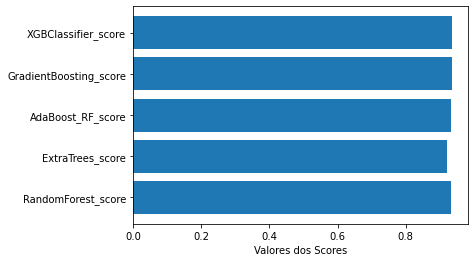

In [35]:
#Criar um dataset com os valores dos scores dos modelos com os dados de teste
scores = pd.DataFrame([Rforest_score,ExtraTrees_score,AdaBoost_score2,
                       GradientBoosting_score,XGBClassifier_score])

scores['columns1'] =  ['RandomForest_score','ExtraTrees_score',"AdaBoost_RF_score",
                       'GradientBoosting_score','XGBClassifier_score']

scores.columns = ['Scores_Teste','Modelos']

#Plotar os scores dos modelos
import matplotlib.pyplot as plt
plt.barh(scores.Modelos,scores['Scores_Teste']);
plt.xlabel('Valores dos Scores');

In [36]:
#Valor dos Scores dos modelos 
scores

,Scores_Teste,Modelos
0,0.933543,RandomForest_score
1,0.920507,ExtraTrees_score
2,0.934358,AdaBoost_RF_score
3,0.936103,GradientBoosting_score
4,0.936103,XGBClassifier_score


**De modo geral não há grande diferença entre os modelos bagging e boosting para esse conjunto de dados**

# Conclusão:

**Nesse estudo o objetivo foi mostrar como funciona os modelos ensemble e seus algoritmos, qual a influência de um modelo bagging e boosting no resultado final. Não focamos na parametrização dos algoritmos, pois com ele poderíamos ter resultados ainda mais expressivos**